In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

In [7]:
def gen_filename(max_iter=50, dimension=5, inertia=None, tissue_inertia=0, patient_inertia=0):
    if inertia is not None:
        tissue_inertia = inertia
        patient_inertia = inertia
    return 'i%d-d%d-tin%d-pin%d.csv' % (max_iter, dimension, tissue_inertia, patient_inertia)

def sort_df(df):
    df.sort(['patient_id', 'tissue_name'])
    
def remove_singularities(df, threshhold):
    return df[df['err'] < threshhold]

def select_singularities(df, threshhold):
    return df[df['err'] >= threshhold]

def join(df1, df2):
    key = ('patient_id', 'tissue_name')
    aligned = pd.merge(df1, df2, left_on=key, right_on=key)
    return aligned[['err_x', 'err_y']]

def var_exp(df, threshhold=10000):
    dft = remove_singularities(df, threshhold)
    return 1. - sum(dft['err'])/sum(dft['scale'])

In [3]:
#df1 = pd.read_csv(gen_filename(dimension=5))
#df2 = pd.read_csv(gen_filename(dimension=5, inertia=4))
results50 = pd.read_csv(gen_filename(dimension=5))
results52 = pd.read_csv(gen_filename(dimension=5, inertia=2))
results54 = pd.read_csv(gen_filename(dimension=5, inertia=4))
results62 = pd.read_csv(gen_filename(dimension=6, inertia=2))
results72 = pd.read_csv(gen_filename(dimension=7, inertia=2))
results82 = pd.read_csv(gen_filename(dimension=8, inertia=2))
results84 = pd.read_csv(gen_filename(dimension=8, inertia=4))
results80 = pd.read_csv(gen_filename(dimension=8))
results = [results50, results52, results54, results62, results72,
           results82, results84, results80]
results5 = [results50, results52, results54]
results2 = [results52, results62, results72, results82]
results8 = [results80, results82, results84]
dimensions = [5, 5, 5, 6, 7, 8, 8, 8]
inertias = [0, 2, 4, 2, 2, 2, 4, 0]

In [15]:
# describe data
import dataset as dataset_m

ImportError: No module named dataset

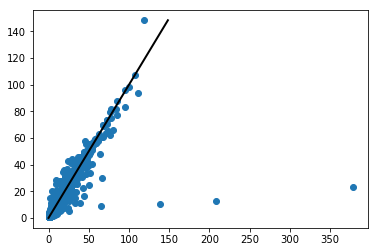

			df1	df2
better in _ cases:	4975	5304
var explained    :	17.762%	18.345%
discounted points:	3	0


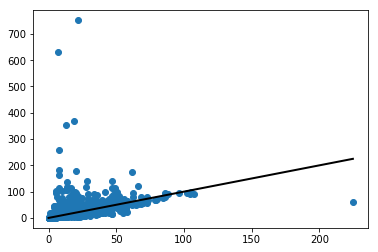

			df1	df2
better in _ cases:	4849	5424
var explained    :	18.264%	13.066%
discounted points:	1	8


''

In [8]:
def compare(df1, df2):
    df1t = remove_singularities(df1, 1000)
    df2t = remove_singularities(df2, 1000)
    comparison = join(df1t, df2t)
    #print comparison
    X = comparison.err_x
    Y = comparison.err_y
    show_comparison(X, Y, df1, df2, df1t, df2t)
    return X, Y

def show_comparison(X, Y, df1, df2, df1t, df2t):
    plt.scatter(X, Y)
    plt.plot([0, min((max(X),max(Y)))], [0, min((max(X),max(Y)))], color='k', linestyle='-', linewidth=2)
    plt.show()
    d1_better = 0
    d2_better = 0
    for i in range(len(X)):
        if X[i] < Y[i]:
            d1_better += 1
        elif Y[i] < X[i]:
            d2_better += 1
    print '\t\t\tdf1\tdf2'
    print 'better in _ cases:\t%d\t%d' % (d1_better, d2_better)
    print 'var explained    :\t%.3f%%\t%.3f%%' % (100.*var_exp(df1t), 100.*var_exp(df2t))
    print 'discounted points:\t%d\t%d' % (len(df1) - len(df1t), len(df2)-len(df2t))
    
compare(results50, results54)
compare(results52, results82)

;

plot vs #tissues


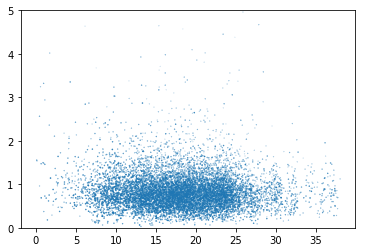

plot vs #patients


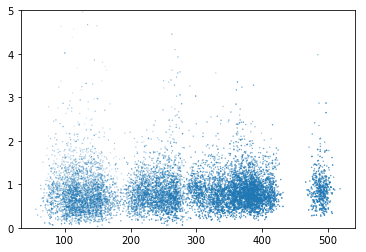

plot vs #tissues^-1


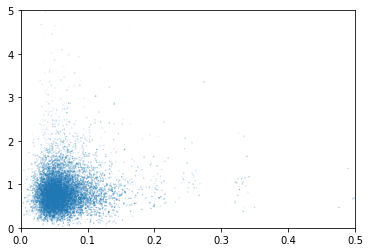

plot vs #tissues^-1 + #patients^-1


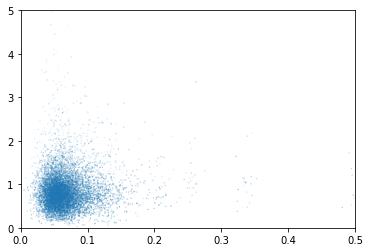

In [11]:
def correlate_err(df):
    Y = df['err']/df['scale']
    #print Y
    
    print 'plot vs #tissues'
    X = np.array(df['#tissues'].tolist())
    X_blur = X + np.random.randn(len(X))/2
    plt.scatter(X_blur, Y, s=df['scale']/150)
    plt.ylim(0, 5)
    plt.show()
    
    print 'plot vs #patients'
    X_blur = np.array(df['#patients'].tolist()) + np.random.randn(len(X))*8.
    plt.scatter(X_blur, Y, s=df['scale']/150)
    plt.ylim(0, 5)
    plt.show()
    
    print 'plot vs #tissues^-1'
    X_blur = np.array((1./df['#tissues']).tolist()) + np.random.randn(len(X))*.01
    plt.scatter(X_blur, Y, s=df['scale']/600.)
    plt.ylim(0, 5)
    plt.xlim(0, .5)
    plt.show()
    
    print 'plot vs #tissues^-1 + #patients^-1'
    X_blur = np.array((1./df['#tissues'] + 1./df['#patients']).tolist()) + np.random.randn(len(X))*.01
    plt.scatter(X_blur, Y, s=df['scale']/1000.)
    plt.ylim(0, 5)
    plt.xlim(0, .5)
    plt.show()
correlate_err(results62)

Variance Explained vs. Inertia with 5 dimensions


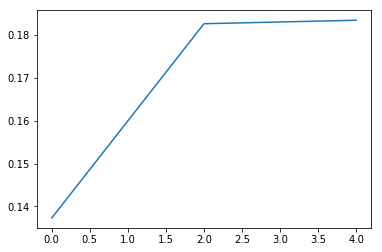

Variance Explained vs. Dimension with 2 inertia


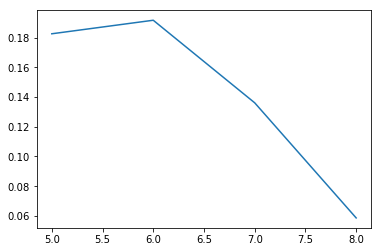

Variance Explained vs. Inertia with 8 dimensions


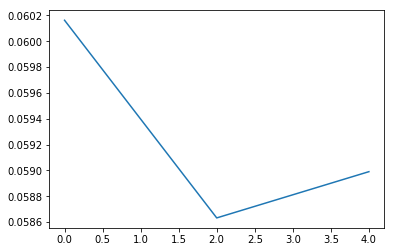

In [12]:
# simple var_exp comparisons
results5 = [results50, results52, results54]
var5 = [var_exp(result, threshhold=10000) for result in results5]
print 'Variance Explained vs. Inertia with 5 dimensions'
plt.plot([0, 2, 4], var5)
plt.show()

results2 = [results52, results62, results72, results82]
var2 = [var_exp(result, threshhold=10000) for result in results2]
print 'Variance Explained vs. Dimension with 2 inertia'
plt.plot([5, 6, 7, 8], var2)
plt.show()

results8 = [results80, results82, results84]
var8 = [var_exp(result, threshhold=10000) for result in results8]
print 'Variance Explained vs. Inertia with 8 dimensions'
plt.plot([0, 2, 4], var8)
plt.show()

## Variance Explained Analysis
### Dimension
6 dimension seems to be best, even though BIC score is lower for 5 dimensions. May want to check if BIC score is very close for dimensionality 5 and 6.

using 8 dimensions is horrible, with graph indicating that adding more dimensions will be even worse.
- Possible application of semi-parametric model to choose dimension? To regularize to softly choose dimension?

In future tests, focus on dimension=6

### Inertia
Significant improvement when increasing inertia to 4 on dimensionality 5 model, but statistically insignificant results for dimensionality 8. Possibly because the model is so bad at dimensionality 8 that the overfitting error swamps all others.

Results indicate that possibly increasing inertia beyond 4 would be even more beneficial, but graph is too low resolution to give a good guess of the optimal inertia value.

Gross Errors vs. Inertia with 5 dimensions


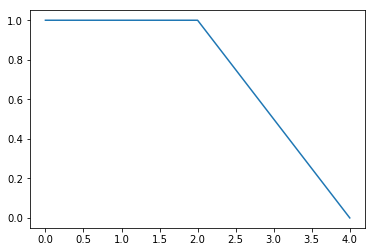

Gross Errors vs. Dimension with 2 inertia


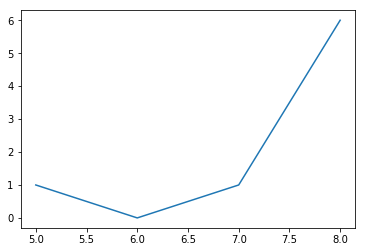

Gross Errors vs. Inertia with 8 dimensions


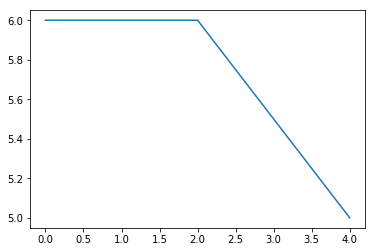

In [13]:
# view gross errors by dim, inertia
results5 = [results50, results52, results54]
gross5 = [len(select_singularities(result, threshhold=10000)) for result in results5]
print 'Gross Errors vs. Inertia with 5 dimensions'
plt.plot([0, 2, 4], gross5)
plt.show()

results2 = [results52, results62, results72, results82]
gross2 = [len(select_singularities(result, threshhold=10000)) for result in results2]
print 'Gross Errors vs. Dimension with 2 inertia'
plt.plot([5, 6, 7, 8], gross2)
plt.show()

results8 = [results80, results82, results84]
gross8 = [len(select_singularities(result, threshhold=10000)) for result in results8]
print 'Gross Errors vs. Inertia with 8 dimensions'
plt.plot([0, 2, 4], gross8)
plt.show()

In [14]:
# View gross errors
for i in range(len(results)):
    df = results[i]
    dim = dimensions[i]
    iner = inertias[i]
    sing = select_singularities(df, 1000)
    print '\nDimension: %d, Inertia: %d, #Singularities: %d' % (dim, iner, len(sing))
    print sing[['scale', 'err', '#tissues', 'tissue_name']]


Dimension: 5, Inertia: 0, #Singularities: 3
          scale           err  #tissues tissue_name
7681  12.081088   5152.075062         1       Ovary
8468  11.787133   1178.366003         1   Pituitary
9206  11.292360  22725.232427         1      Testis

Dimension: 5, Inertia: 2, #Singularities: 1
         scale            err  #tissues tissue_name
8430  4.615556  144975.944348         1   Pituitary

Dimension: 5, Inertia: 4, #Singularities: 0
Empty DataFrame
Columns: [scale, err, #tissues, tissue_name]
Index: []

Dimension: 6, Inertia: 2, #Singularities: 0
Empty DataFrame
Columns: [scale, err, #tissues, tissue_name]
Index: []

Dimension: 7, Inertia: 2, #Singularities: 4
           scale           err  #tissues           tissue_name
471     3.842708   1665.637373         1  Minor_Salivary_Gland
6414    9.604037   2762.116881         1                 Liver
8171   11.292360   1728.154842         1                Testis
10249   6.206804  13307.303219         1                Uterus

Dimen

## Gross Error Analysis
### Patterns
All of (the worst of) the gross errors are when reconstructing a patient with a single tissue.

Over-represented Pituitary tissue?

No correlation with high scale (if anything, anti-correlated)

No correlation with inertia

Extremely correlated with dimension - evidence that issue arises from near-singular matrix inversion

### Todo
Double check if #tissues is refers to AFTER removal or before.

check if pituitary is, in fact, over represented.
- count the number of patients with pituitary (and only one other?) tissue

Verify issue arises from near-singular matrices

Theorize method of handling near-singular matrices

check if ALL patients with 2 tissues have gross error - should they?